# Machine Learning and NLP Exercises #

## Introduction ##

We will be using the same review data set from Kaggle from Week 2 for this exercise. The product we'll focus on this time is a cappuccino cup. The goal of this week is to not only preprocess the data, but to classify reviews as positive or negative based on the review text.

The following code will help you load in the data.

In [1]:
import nltk
import pandas as pd

In [2]:
data = pd.read_csv('../data/coffee.csv')
data.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Create a new data set for modeling with the following columns:
     - Column 1: 'positive' if review = 4 or 5, and 'negative' if review = 1 or 2
     - Column 2: review text
* Take a look at the number of positive and negative reviews in the newly created data set.

Checkpoint: the resulting data set should have 514 reviews.

Use the preprocessing code below to clean the reviews data before moving on to modeling.

In [3]:
# 1.1

data.shape[0]

542

In [4]:
# 1.2 

percent=lambda x: len([w for w in data['stars'] if w==x])*100/(data.shape[0])

result=list(map(percent,[1,2,3,4,5]))
result

[17.71217712177122,
 8.302583025830259,
 5.166051660516605,
 11.992619926199263,
 56.82656826568266]

In [5]:
# 1.3 (Little long)

data.replace({'stars':4,'stars':5},'positive',inplace=True)
        
data.head(3)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,positive,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...


In [6]:
# 12 in head because at 11 index first 4 appear so see the result we have taken 

data.replace({'stars':4},'positive',inplace=True)
data.head(12)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,positive,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...
5,A35NA371SV1PAH,3,Not enough coffee flavor and definitely to swe...
6,A1LR5HPNQLH4RI,1,don't bother! bet you couldn't tell the differ...
7,A2RCZ8YKLE8B3O,1,"Never tasted this coffee before, I felt much t..."
8,A31D6GWYLIKF4X,2,While the overall idea behind the product is l...
9,A1KZPDB5MOWNVU,positive,I bought a keurig and bought these to try. Wel...


In [7]:
data.replace({'stars':1,'stars':2},'negative',inplace=True)
data.head(3)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,positive,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,negative,I bought the Grove Square hazelnut cappuccino ...


In [8]:
data.replace({'stars':1},'negative',inplace=True)
data.head(10)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,negative,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,positive,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,negative,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,negative,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,negative,It's a powdered drink. No filter in k-cup.<br ...
5,A35NA371SV1PAH,3,Not enough coffee flavor and definitely to swe...
6,A1LR5HPNQLH4RI,negative,don't bother! bet you couldn't tell the differ...
7,A2RCZ8YKLE8B3O,negative,"Never tasted this coffee before, I felt much t..."
8,A31D6GWYLIKF4X,negative,While the overall idea behind the product is l...
9,A1KZPDB5MOWNVU,positive,I bought a keurig and bought these to try. Wel...


In [9]:
# now removing row with 3 star

import numpy as np

data.replace({'stars':3},np.nan,inplace=True)
data.head(6)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,negative,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,positive,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,negative,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,negative,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,negative,It's a powdered drink. No filter in k-cup.<br ...
5,A35NA371SV1PAH,NaN,Not enough coffee flavor and definitely to swe...


In [10]:
# now dropping nan value

data.dropna(inplace=True)
data.head(10)

,user_id,stars,reviews
0,A2XP9IN4JOMROD,negative,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,positive,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,negative,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,negative,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,negative,It's a powdered drink. No filter in k-cup.<br ...
6,A1LR5HPNQLH4RI,negative,don't bother! bet you couldn't tell the differ...
7,A2RCZ8YKLE8B3O,negative,"Never tasted this coffee before, I felt much t..."
8,A31D6GWYLIKF4X,negative,While the overall idea behind the product is l...
9,A1KZPDB5MOWNVU,positive,I bought a keurig and bought these to try. Wel...
10,A2QO7WEZM1UDL,positive,My husband and I LOVE this French Vanilla Capp...


In [11]:
# now dropping 'user_id' columns

data=data[['stars','reviews']]
data.shape  # checkpoint given in question

(514, 2)

In [12]:
# 1.4

percent=lambda x: len([w for w in data['stars'] if w==x])*100/(data.shape[0])

result=list(map(percent,['positive','negative']))
result

[72.56809338521401, 27.43190661478599]

In [13]:
# 1.5

# Text preprocessing steps - remove numbers, captial letters and punctuation

import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['reviews'] = data.reviews.map(alphanumeric).map(punc_lower)
data.head()

,stars,reviews
0,negative,i wanted to love this i was even prepared for...
1,positive,grove square cappuccino cups were excellent t...
2,negative,i bought the grove square hazelnut cappuccino ...
3,negative,i love my keurig and i love most of the keuri...
4,negative,it s a powdered drink no filter in k cup br ...


## Question 2 ##

Prepare the data for modeling:
* Split the data into training and test sets. You should have four sets of data - X_train, X_test, y_train, y_test

Create numerical features with Count Vectorizer. Create two document-term matrices:
* Matrix 1: Terms should be unigrams (single words), and values should be word counts (Hint: this is the Count Vectorizer default)
* Matrix 2: Terms should be unigrams and bigrams, and values should be binary values

Recommendation: Utilize Count Vectorizer's stop words function to remove stop words from the reviews text.

In [14]:
# separating independent and dependent variable

x=data['reviews']
y=data['stars']

In [15]:
# converting positive and negative star into numerical form

from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
y=lb.fit_transform(y)
print(type(y))

# '0' corresponds to 'negative' and '1' corresponds to 'positive'
y

<class 'numpy.ndarray'>


array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [16]:
# 2.1

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=51)

In [17]:
type(x_train)

pandas.core.series.Series

In [18]:
# 2.2 (Matrix 1)

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

cv1=CountVectorizer(stop_words='english')
x_train1=cv1.fit_transform(x_train)
x_test1=cv1.transform(x_test)
print(x_train1.toarray().shape)

(385, 1759)


In [19]:
# (Matrix 2)

cv2=CountVectorizer(stop_words='english',ngram_range=(1,2))
x_train2=cv2.fit_transform(x_train)
x_test2=cv2.transform(x_test)
print(x_train2.toarray().shape)

(385, 8500)


## Question 3 ##

Use Logistic Regression to classify reviews as positive or negative. Do this for both matrices.
* Fit a Logistic Regression model on the training data
* Apply the model on the test data and calculate the following error metrics: accuracy, precision, recall, F1 score
* Optional: Visualize the confusion matrix for both models
* Compare the error metrics of the two matrices

Recommendation: Create a function to calculate the error metrics, since you'll be doing this multiple times.

In [20]:
# 3.1 (Matrix_1)

from sklearn.linear_model import LogisticRegression

lr1=LogisticRegression()
lr1.fit(x_train1,y_train)
y1_predict=lr1.predict(x_test1)

C:\Users\uttamraj125\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
y1_predict

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

accuracy_score:  0.8527131782945736
precision_score:  0.8640776699029126
recall_score:  0.9468085106382979
f1_score:  0.9035532994923857
[[21 14]
 [ 5 89]]


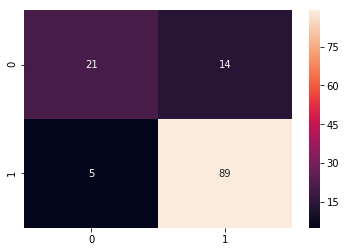

In [22]:
# now performance of the model

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print('accuracy_score: ',accuracy_score(y_test,y1_predict))
print('precision_score: ',precision_score(y_test,y1_predict))
print('recall_score: ',recall_score(y_test,y1_predict))
print('f1_score: ',f1_score(y_test,y1_predict))
print(confusion_matrix(y_test,y1_predict))

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(confusion_matrix(y_test,y1_predict),annot=True)
plt.show()

In [23]:
# 3.1 (Matrix_2)

lr2=LogisticRegression()
lr2.fit(x_train2,y_train)
y2_predict=lr2.predict(x_test2)

C:\Users\uttamraj125\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score:  0.8604651162790697
precision_score:  0.8518518518518519
recall_score:  0.9787234042553191
f1_score:  0.9108910891089108
[[19 16]
 [ 2 92]]


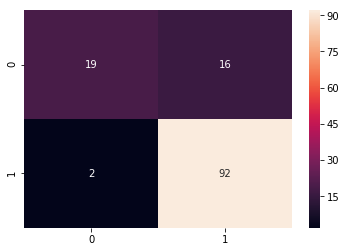

In [24]:
print('accuracy_score: ',accuracy_score(y_test,y2_predict))
print('precision_score: ',precision_score(y_test,y2_predict))
print('recall_score: ',recall_score(y_test,y2_predict))
print('f1_score: ',f1_score(y_test,y2_predict))
print(confusion_matrix(y_test,y2_predict))


sns.heatmap(confusion_matrix(y_test,y2_predict),annot=True)
plt.show()

### Note:
Matrix_2 is better in terms of performance than Matrix_1

## Question 4 ##

Let's try using another machine learning technique to classify these reviews as positive or negative. Go through the exact same exercise in the previous step, except this time, use Naive Bayes instead of Logistic Regression.

For count data, use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). For binary data, use [Bernoulli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB).

Compare the results of both the Logistic Regression and Naive Bayes models.

In [25]:
# 4.1 (Matrix_1)

from sklearn.naive_bayes import MultinomialNB

mn1=MultinomialNB()
mn1.fit(x_train1,y_train)
yy1_predict=mn1.predict(x_test1)

C:\Users\uttamraj125\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score:  0.9069767441860465
precision_score:  0.9019607843137255
recall_score:  0.9787234042553191
f1_score:  0.9387755102040817
[[25 10]
 [ 2 92]]


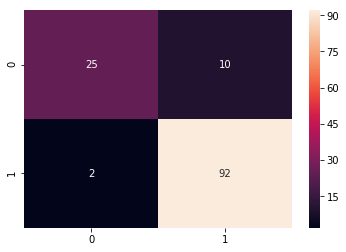

In [26]:
print('accuracy_score: ',accuracy_score(y_test,yy1_predict))
print('precision_score: ',precision_score(y_test,yy1_predict))
print('recall_score: ',recall_score(y_test,yy1_predict))
print('f1_score: ',f1_score(y_test,yy1_predict))
print(confusion_matrix(y_test,yy1_predict))

sns.heatmap(confusion_matrix(y_test,yy1_predict),annot=True)
plt.show()

In [27]:
# 4.1(Matrix_2)

mn2=MultinomialNB()
mn2.fit(x_train2,y_train)
yy2_predict=mn2.predict(x_test2)

C:\Users\uttamraj125\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score:  0.8682170542635659
precision_score:  0.8598130841121495
recall_score:  0.9787234042553191
f1_score:  0.9154228855721392
[[20 15]
 [ 2 92]]


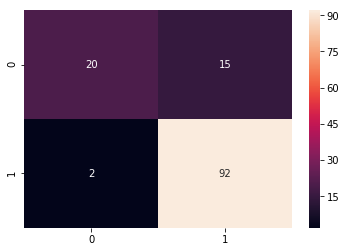

In [28]:
print('accuracy_score: ',accuracy_score(y_test,yy2_predict))
print('precision_score: ',precision_score(y_test,yy2_predict))
print('recall_score: ',recall_score(y_test,yy2_predict))
print('f1_score: ',f1_score(y_test,yy2_predict))
print(confusion_matrix(y_test,yy2_predict))


sns.heatmap(confusion_matrix(y_test,yy2_predict),annot=True)
plt.show()

### Note:
Matrix_1 is better in terms of performance than Matrix_2

## Question 5 ##

Up to this point, we've been using Count Vectorizer to create document-term matrices to input into the models. For at least one of the four models you've created so far, use TF-IDF Vectorizer instead of Count Vectorizer, and see if it improves the results.

Out of all of the models you've created, which model do you think best classifies positive and negative cappuccino cup reviews?

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(stop_words='english')
x_tf=tf.fit_transform(x_train)
y_tf=tf.transform(x_test)
x_tf.toarray().shape

(385, 1759)

In [30]:
# 3.1 (Matrix_2)

lr3=LogisticRegression()
lr3.fit(x_tf,y_train)
y3_predict=lr3.predict(y_tf)

C:\Users\uttamraj125\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score:  0.8294573643410853
precision_score:  0.8103448275862069
recall_score:  1.0
f1_score:  0.8952380952380952
[[13 22]
 [ 0 94]]


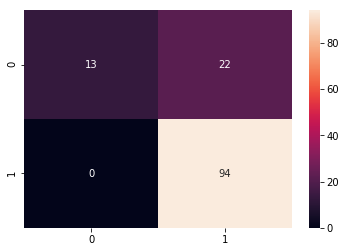

In [31]:
print('accuracy_score: ',accuracy_score(y_test,y3_predict))
print('precision_score: ',precision_score(y_test,y3_predict))
print('recall_score: ',recall_score(y_test,y3_predict))
print('f1_score: ',f1_score(y_test,y3_predict))
print(confusion_matrix(y_test,y3_predict))

sns.heatmap(confusion_matrix(y_test,y3_predict),annot=True)
plt.show()

## Note:
we are comparing Model_2 from Question number 3 and Model_1 from Question number 4 and Model from Question number 5 but Model_1 from Question number 4 is best.